Временные ряды - финальный проект
====

Основное задание
---

В данном проекте главной задачей будет построить алгоритм, определяющий поиски аномалий.

Можно так же сделать симуляцию своей системы, то есть проверить, как система работала бы в продакшине, какие данные она бы использовала для перетренировки и как часто эта перетренировка бы соврешалась.

**На выбор** у вас два датасета. Один имеет много данных, а второй  временной ряд наоборот, содержат в себе еще очень мало информации. Вы так же можете использовать и другие датасеты из тех, что у вас есть в доступе на гитхабе. Но тогда вам прийдется сформулировать и ту задачу, которую вы пытаетесь решить, а именно пояснить, зачем в данном случае нам нужен поиск аномалий и как это будет применено на практике. 


Датасеты
------

Пассажиропоток нью-йоркского такси
--


In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")
from pmdarima import auto_arima 
import pandas as pd 
import numpy as np
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.arima.model  import ARIMA


import statsmodels.api as sm

In [8]:

df = pd.read_csv('datatest/nyc_taxi.csv')
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp',inplace=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)


<AxesSubplot:>

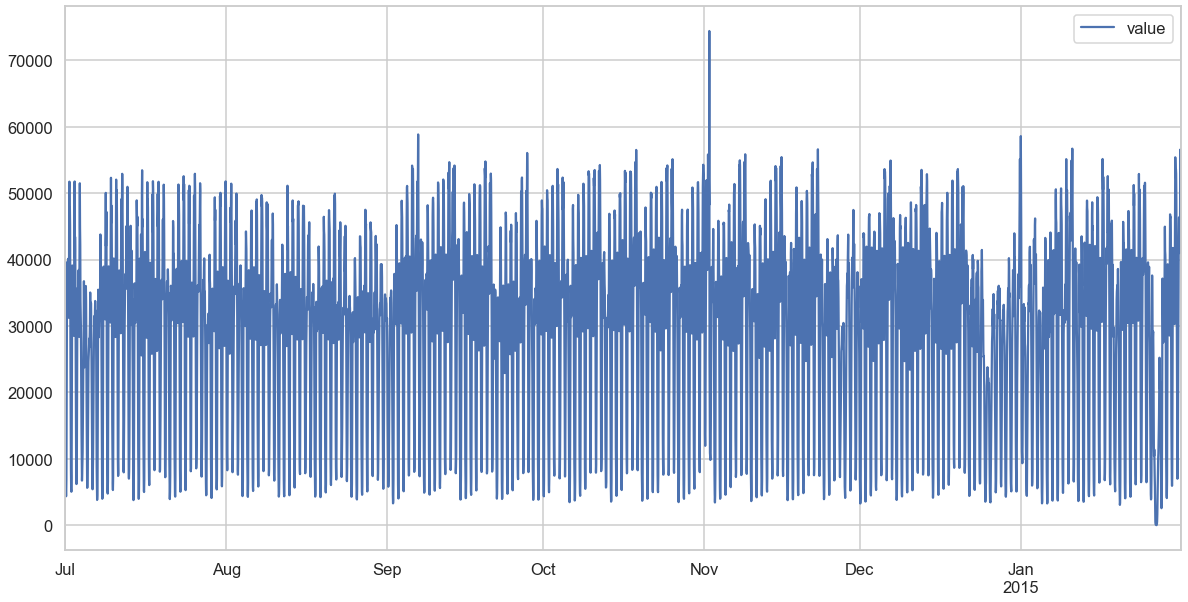

In [25]:
df = df.resample('H').sum()
df.plot()

In [27]:
result = adfuller(df['value'])
print('p-value: %f' % result[1])

p-value: 0.000000


Ряд стационарный - отличненько

In [30]:
size = int(len(df)*0.8)
train, test = df[0:size], df[size:]

AutoARIMA_model = auto_arima(train["value"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=24, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
AutoARIMA_model.summary()

KeyboardInterrupt: 

In [28]:
order = (0,1,1)
seasonal_order = (0,1,[1,2],12)

SARIMA_model = ARIMA(train, order=order, seasonal_order=seasonal_order)

SARIMA_model_fit = SARIMA_model.fit()

predictions = SARIMA_model_fit.forecast(len(test))
Sarima_r2score = r2_score(test, predictions)
Sarima_mae = np.round(mean_absolute_error(test, predictions),2)
test.plot()
predictions.plot()
plt.show()

C:\Users\kate\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyboardInterrupt: 

Данные за период с Июля, 2014 года по Январь, 2015. Агрегированы с интервалом в 30 минут.

Задание:
----

* Агрегировать данные по 1 часу
* Построить алгоритм определения аномалий с задержкой в 24 часа

